In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Loading Dataset

In [2]:
def load_data():
    """
    Returns:
    X - training data with dimensions (n_of_features, n_of_examples)
    Y - labels (1 on the class index, -1 elsewhere) with dimensions (n_of_features, n_of_examples)
    """
    x1 = []
    x2 = []
    classes = []
    with open('tren_data1_06.txt') as f:
        for line in f:
            line = line.split()
            
            x1.append(float(line[0]))
            x2.append(float(line[1]))
            classes.append(int(float(line[2])))
    
    X = np.array([[x1, x2] for x1, x2 in zip(x1, x2)])
    
    classes = np.array(classes)
    """
    Y = np.zeros(shape=(classes.shape[0], classes.max()))
    Y[np.arange(classes.shape[0]), classes-1] = 1
    """
    Y = np.ones(shape=(classes.shape[0], classes.max()))
    Y[np.arange(classes.shape[0]), classes-1] = -1
    Y = -Y

    return X.T, Y.T, classes

In [3]:
X, Y, classes = load_data()

print(X[:,0])
print(Y[:,0])
# print(classes)

[ 4.0468461 -7.4922288]
[ 1. -1. -1. -1. -1.]


In [4]:
def plotPoints(X, classes):
    plt.figure(figsize=(10, 7))
    X = np.array(X)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=classes)
    plt.title("Zobrazeni dat", fontsize=18)
    ax = plt.gca()
    ax.set_facecolor('white')
    plt.show()

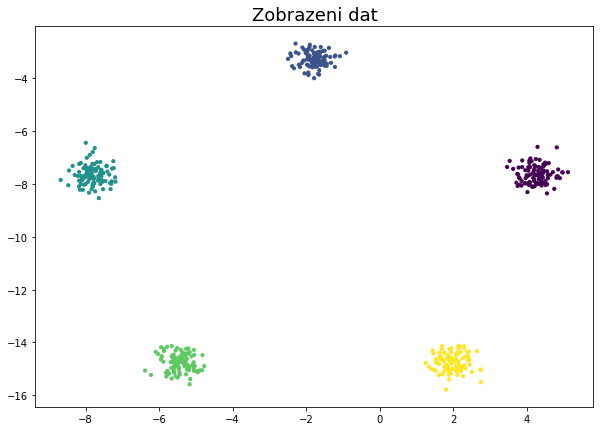

In [5]:
plotPoints(X.T, classes)

### Initialization

In [6]:
def initialize_parameters(n_x, n_y):
    """
    Argument:
    n_x - size of the input layer
    n_y - size of the output layer
    
    Returns:
    W - weight matrix of shape (n_y, n_x)
    b - bias vector of shape(n_y- 1)
    """
    
    W = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y,1))
    
    return W, b

In [7]:
# parametry site
W, b = initialize_parameters(2, 5)
print(W.shape)
print(b.shape)
print(W)
print(b)

(5, 2)
(5, 1)
[[-0.02120729 -0.01908299]
 [-0.01699947  0.00356529]
 [-0.00218942  0.02119182]
 [-0.00617007  0.01000156]
 [-0.00566544 -0.00121033]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


### Forward Propagation

In [8]:
def forward_propagation(X, W, b):
    """
    Argument:
    X - input data of size (n_x, m)
    W - weights matrix
    b - bias vector
    
    Returns:
    A - The output of the activation
    """
    
    Z = np.dot(W, X) + b
    A = np.sign(Z)
    
    return A

In [9]:
A = forward_propagation(X, W, b)

In [10]:
print(A.shape)
print(A[:,0])
print(A[:,250])

(5, 500)
[ 1. -1. -1. -1. -1.]
[ 1.  1. -1. -1.  1.]


### Compute Cost

In [11]:
def compute_cost(A, Y):
    """
    Argument:
    A - output of neural network
    Y - correct label
    
    Returns:
    E - error across all training examples
    """
    
    cost_vec = np.zeros((Y.shape[1],1))
    
    for i in range(Y.shape[1]):
        cost_vec[i,0] = np.dot((Y-A)[:,i], (Y-A)[:,i].T)
    
    #print(cost_vec.shape)
    summed_cost = np.sum(cost_vec, axis=0)
    #print(summed_cost)
    
    E = 1/2 * summed_cost[0]
    
    return E

In [12]:
E = compute_cost(A, Y)
print(E)

2200.0


### Backward propagation

In [13]:
def backward_propagation(A, Y, X):
    m = X.shape[1]
    
    dZ = Y - A
    dW = (1/m) * np.dot(dZ,X.T)
    db = (1/m) * (np.sum(dZ,axis=1,keepdims=True))
    return dW, db

In [14]:
print(W)
dW, db = backward_propagation(A, Y, X)
print(dW)

[[-0.02120729 -0.01908299]
 [-0.01699947  0.00356529]
 [-0.00218942  0.02119182]
 [-0.00617007  0.01000156]
 [-0.00566544 -0.00121033]]
[[ 5.22038879 16.17763643]
 [ 5.30324128  8.96714197]
 [-3.12611401 -3.0610734 ]
 [-2.17712726 -5.90606858]
 [ 6.01372704 10.27852894]]


### Update parameters

In [15]:
def update_parameters(W, b, dW, db, learning_rate):
    W = W + learning_rate * dW
    b = b + learning_rate * db
    return W, b

In [16]:
learning_rate = 0.1
W, b = update_parameters(W, b, dW, db, learning_rate)
print(b.shape)

(5, 1)


## Model

In [21]:
def nn_model(X, Y, learning_rate, num_iterations, print_cost):
    
    W, b = initialize_parameters(2,5)
    print("Initial weight matrix \n" + str(W) + "\n")
    print("Initial bias vector \n" + str(b) + "\n")
    
    for i in range(0, num_iterations):
        A = forward_propagation(X, W, b)
        cost = compute_cost(A, Y)
        dW, db = backward_propagation(A, Y, X)
        W, b = update_parameters(W, b, dW, db, learning_rate)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
        if cost == 0: # 250 pro ty druhy data
            print("Neural network has been trained after %i iterations \n" %i)
            break;
            
    print("Trained weight matrix \n" + str(W) + "\n")
    print("Trained bias vector \n" + str(b) + "\n")
    
    return W,b

In [22]:
W,b = nn_model(X, Y, learning_rate=0.01, num_iterations=1000, print_cost=True)

Initial weight matrix 
[[ 1.32002465e-02  8.25517847e-03]
 [-1.16660198e-03 -4.44945990e-03]
 [ 9.83068999e-05 -6.85936598e-03]
 [ 1.34057009e-03 -1.07705306e-02]
 [ 2.34579935e-02  4.64388849e-03]]

Initial bias vector 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Cost after iteration 0: 2980.000000
Cost after iteration 100: 600.000000
Cost after iteration 200: 600.000000
Cost after iteration 300: 200.000000
Cost after iteration 400: 204.000000
Cost after iteration 500: 218.000000
Cost after iteration 600: 202.000000
Cost after iteration 700: 100.000000
Cost after iteration 800: 200.000000
Neural network has been trained after 830 iterations 

Trained weight matrix 
[[ 0.09637344  0.02500674]
 [ 0.00367434  0.01451038]
 [-0.08431134  0.06976164]
 [-0.02082393 -0.01900679]
 [ 0.08550589 -0.05245764]]

Trained bias vector 
[[ 0.00308]
 [ 0.07188]
 [-0.00636]
 [-0.35496]
 [-0.84296]]



In [23]:
A = forward_propagation(X, W, b)
print(A[:,220])
print(Y[:,220])

[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]


## Klasifikace rastru

In [24]:
def createraster(X, pointsinrow):
    boundary = [np.amax(X[1, :]) + 0.2, np.amax(X[0, :]) + 0.2, np.amin(X[1, :]) - 0.2, np.amin(X[0, :]) - 0.2]  # clockwise
    
    print(np.amax(X[1, :]))
    print(np.amax(X[0, :]))
    print(np.amin(X[1, :]))
    print(np.amin(X[0, :]))
    
    top, right, bottom, left = boundary
    columnpoints = top - bottom
    raster = np.linspace([left, top], [right, top], pointsinrow)
    top -= columnpoints / pointsinrow

    while top >= bottom:
        raster_row = np.linspace([left, top], [right, top], pointsinrow)
        raster = np.concatenate((raster, raster_row), axis=0)
        top -= columnpoints / pointsinrow

    plt.show()

    return raster

In [25]:
pointsinrow = 200  # points in 1 row
raster = createraster(X, pointsinrow)

-2.6818216
5.124519
-15.78233
-8.6821029


In [26]:
raster_classified = forward_propagation(raster.T, W, b)

In [27]:
raster_classes = []
points_with_class = []
points_without_class = []
for i in range(raster_classified.shape[1]):
    
    column = raster_classified[:,i]
    column_sum = np.sum(column)
    
    if column_sum == -3:
        raster_classes.append(np.squeeze(np.where(column == 1)))
        points_with_class.append(raster[i])

## Vykresleni oklasifikovaneho rastru

In [32]:
def plotPoints2(X, classes, Y, classes2):
    X = np.array(X)
    Y = np.array(Y)
    classes = np.array(classes)
    classes2 = np.array(classes2)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(Y[:, 0], Y[:, 1], s=10, c=classes2)
    plt.scatter(X[:, 0], X[:, 1], s=10, c='salmon') # 'salmon' nebo classes
    plt.title("Zobrazeni dat", fontsize=18)
    ax = plt.gca()
    ax.set_facecolor('white')
    plt.show()

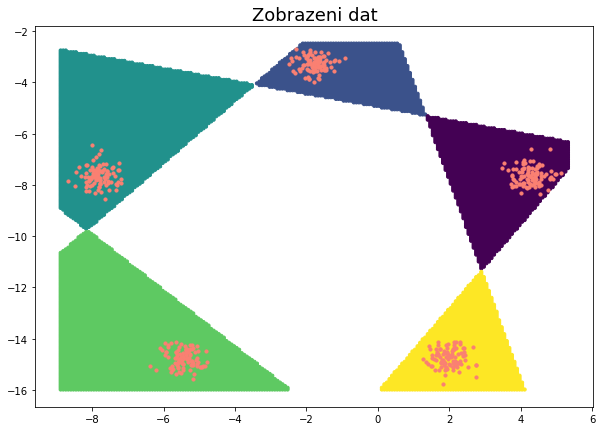

In [33]:
#plotPoints(points_with_class, raster_classes)
#plotPoints(X.T, classes)
plotPoints2(X.T, classes, points_with_class, raster_classes)